In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Tensorflow 2.0.0 Basics Review
## - tf variables
## - tf operations
## - tf keras API

In [20]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn')

In [3]:
'''
- check tensorflow and keras version
'''
print(f'Tensorflow GPU Version: {tf.__version__}')
print(f'Eager Execution is: {tf.executing_eagerly()}')
print(f'Keras Version: {tf.keras.__version__}')

Tensorflow GPU Version: 2.0.0
Eager Execution is: True
Keras Version: 2.2.4-tf


In [4]:
'''
- check GPU 
'''
var = tf.Variable([3,3])
if tf.test.is_gpu_available():
    print('Running on GPU')
else:
    print('Runing on CPU')

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Running on GPU


Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

# tf variables

In [62]:
'''
- Declare variables
'''
var = 56
tf1 = tf.Variable(var, dtype=tf.float32)
tf1.assign(5.6)
tf2 = tf.Variable([[0,4,5],[4,2,7],[7,8,9]])
print('tf1: ',tf1)
print('tf2: ',tf2)
print(f'tf1 iwth Numpy: {tf1.numpy()}')

tf1:  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.6>
tf2:  <tf.Variable 'Variable:0' shape=(3, 3) dtype=int32, numpy=
array([[0, 4, 5],
       [4, 2, 7],
       [7, 8, 9]], dtype=int32)>
tf1 iwth Numpy: 5.599999904632568


In [72]:
'''
- Declare Constants
'''
constantVar = tf.constant(568, dtype = tf.int16)
print(constantVar)
print(constantVar.numpy())

tf.Tensor(568, shape=(), dtype=int16)
568


In [86]:
'''
- Reshape a tensor
'''
var = tf.Variable([[2,3,4,5],[5,2,9,0],[3,1,2,4]], dtype=tf.float32)
print('var shape:',var.shape)
var1 = tf.reshape(var,(2,6))
print('var1 shape:',var1.shape)
var2 = tf.reshape(var, (1,12))
print('var2 shape:',var2.shape)
var3 = tf.reshape(var, (4,3))
print('var3 shape:',var3.shape)

var shape: (3, 4)
var1 shape: (2, 6)
var2 shape: (1, 12)
var3 shape: (4, 3)


In [43]:
'''
- tensor dimention
- tensor slice
- tensor cast numpy
- tensor slice
- tensor dtype
'''
var = tf.Variable([[[2,3,4,5],[5,2,9,0],[3,1,2,4]],[[0,30,40,50],[5,2,9,0],[3,1,2,4]],[[12,13,14,15],[5,2,9,0],[3,1,2,4]]], dtype=tf.float32)
print('var rank:',tf.rank(var))
var2 = var[0:2]
print('var2 slice:',var2)
print('var2 rank:',tf.rank(var2).numpy())
print('var2 size:',tf.size(var2).numpy())
print('var2 dtype:', var2.dtype)

var rank: tf.Tensor(3, shape=(), dtype=int32)
var2 slice: tf.Tensor(
[[[ 2.  3.  4.  5.]
  [ 5.  2.  9.  0.]
  [ 3.  1.  2.  4.]]

 [[ 0. 30. 40. 50.]
  [ 5.  2.  9.  0.]
  [ 3.  1.  2.  4.]]], shape=(2, 3, 4), dtype=float32)
var2 rank: 3
var2 size: 24
var2 dtype: <dtype: 'float32'>


In [53]:
'''
- tensor element-wise primitive tensor operations
- tensor broadcasting
'''
var1 = tf.Variable([[[2,3,4,5],[5,2,9,0],[3,1,2,4]],[[0,30,40,50],[5,2,9,0],[3,1,2,4]],[[12,13,14,15],[5,2,9,0],[3,1,2,4]]], dtype=tf.float32)
var2 = tf.Variable([[[2,2,2,2],[2,2,2,2],[2,2,2,2]],[[2,2,2,2],[2,2,2,2],[2,2,2,2]],[[2,2,2,2],[2,2,2,2],[2,2,2,2]]], dtype=tf.float32)
var = var1 * var2
print('var tensor:\n',var)
print('\nvar numpy cast:\n',var.numpy())
print('\nvar*4:\n',var*4)

var tensor:
 tf.Tensor(
[[[  4.   6.   8.  10.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]

 [[  0.  60.  80. 100.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]

 [[ 24.  26.  28.  30.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]], shape=(3, 3, 4), dtype=float32)

var numpy cast:
 [[[  4.   6.   8.  10.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]

 [[  0.  60.  80. 100.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]

 [[ 24.  26.  28.  30.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]]

var*4:
 tf.Tensor(
[[[ 16.  24.  32.  40.]
  [ 40.  16.  72.   0.]
  [ 24.   8.  16.  32.]]

 [[  0. 240. 320. 400.]
  [ 40.  16.  72.   0.]
  [ 24.   8.  16.  32.]]

 [[ 96. 104. 112. 120.]
  [ 40.  16.  72.   0.]
  [ 24.   8.  16.  32.]]], shape=(3, 3, 4), dtype=float32)


In [68]:
'''
- tensor multiplication
- tensor constant
- tensor constant cast
'''
var1 = tf.constant([[1,2,3],[4,5,3]])
var2 = tf.constant([[1,2,3],[4,5,3]])
var = tf.matmul(var1,tf.transpose(var2))
print('var:\n',var)
var = tf.cast(var, dtype=tf.float32)
print('\nvar dtype:', var.dtype)

var:
 tf.Tensor(
[[14 23]
 [23 50]], shape=(2, 2), dtype=int32)

var dtype: <dtype: 'float32'>


In [88]:
'''
- ragged tensors by constant
- ragged tensors by split_row
'''
ragged_tensor = tf.ragged.constant([[1,2,4],[],[3,4],[1]], dtype=tf.float32, name='ragged_tensor')
print(ragged_tensor)
print(ragged_tensor[0])
print(ragged_tensor[3])
ragged_tensor2 = tf.RaggedTensor.from_row_splits(values=[1,2,4,5,6,7,8], row_splits=[0,3,3,5,6,7])
print(ragged_tensor2)

<tf.RaggedTensor [[1.0, 2.0, 4.0], [], [3.0, 4.0], [1.0]]>
tf.Tensor([1. 2. 4.], shape=(3,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
<tf.RaggedTensor [[1, 2, 4], [], [5, 6], [7], [8]]>


# tf operations

In [106]:
'''
- calculate square differences
'''
t1 = tf.random.normal((3,1))
t2 = tf.random.normal((3,1))
t = tf.math.squared_difference(t1,t2,name='square_difference')
print('_t1:\n',t1)
print('_t2:\n',t2)
print('_t:\n',t)

_t1:
 tf.Tensor(
[[0.23302452]
 [0.33036613]
 [0.07002912]], shape=(3, 1), dtype=float32)
_t2:
 tf.Tensor(
[[-1.1006709 ]
 [-0.40500164]
 [-1.2100329 ]], shape=(3, 1), dtype=float32)
_t:
 tf.Tensor(
[[1.7787435 ]
 [0.54076576]
 [1.638559  ]], shape=(3, 1), dtype=float32)


In [180]:
'''
- calculate tensor mean
'''
var = tf.constant(tf.random.uniform((3,3),minval=0, maxval= 10, dtype=tf.float32))
cross_mean = tf.reduce_mean(var, axis=None)
x_mean = tf.reduce_mean(var, axis=0)
y_mean = tf.reduce_mean(var, axis=1)
x_mean_dim = tf.reduce_mean(var, axis=0,keepdims=True)
y_mean_dim = tf.reduce_mean(var, axis=1, keepdims=True)
print('_var:\n',var)
print('\n_cross_mean:\n',cross_mean)
print('\n_x_mean:\n',x_mean)
print('\n_x_mean_same_dim:\n',x_mean_dim)
print('\n_y_mean:\n',y_mean)
print('\n_y_mean_same_dim:\n',y_mean_dim)

_var:
 tf.Tensor(
[[8.844145   8.424911   5.7227373 ]
 [4.715581   8.562659   7.411667  ]
 [0.57933927 8.567917   4.0922523 ]], shape=(3, 3), dtype=float32)

_cross_mean:
 tf.Tensor(6.324579, shape=(), dtype=float32)

_x_mean:
 tf.Tensor([4.7130218 8.518496  5.7422185], shape=(3,), dtype=float32)

_x_mean_same_dim:
 tf.Tensor([[4.7130218 8.518496  5.7422185]], shape=(1, 3), dtype=float32)

_y_mean:
 tf.Tensor([7.6639304 6.8966355 4.4131694], shape=(3,), dtype=float32)

_y_mean_same_dim:
 tf.Tensor(
[[7.6639304]
 [6.8966355]
 [4.4131694]], shape=(3, 1), dtype=float32)


In [168]:
'''
- tensors with random normal values
'''
tf.random.set_seed(2)
var_random1 = tf.random.normal((4,1),mean=0,stddev=1)
var_random2 = tf.random.normal((4,1),mean=5,stddev=10)
print('_random_var1:\n',var_random1)
print('_random_var2:\n',var_random2)

_random_var1:
 tf.Tensor(
[[ 0.43616885]
 [-1.9093795 ]
 [ 1.3789066 ]
 [-1.0405852 ]], shape=(4, 1), dtype=float32)
_random_var2:
 tf.Tensor(
[[ 4.6377807]
 [14.660629 ]
 [-6.065405 ]
 [ 7.9940577]], shape=(4, 1), dtype=float32)


In [187]:
'''
- tensors with random uniform values
'''
tf.random.set_seed(2)
var1 = tf.random.uniform((4,1),minval=1, maxval=4, dtype=tf.int32)
var2 = tf.random.uniform((4,1),minval=5, maxval=8, dtype=tf.int32)
var_concat_x = tf.concat(values=[var1,var2],axis=0)
var_concat_y = tf.concat(values=[var1,var2],axis=1)
print('_var1:',var1)
print('_var2:',var2)
print('_var_concat_x:',var_concat_x)
print('_var_concat_y:',var_concat_y)

_var1: tf.Tensor(
[[3]
 [1]
 [3]
 [1]], shape=(4, 1), dtype=int32)
_var2: tf.Tensor(
[[7]
 [5]
 [7]
 [7]], shape=(4, 1), dtype=int32)
_var_concat_x: tf.Tensor(
[[3]
 [1]
 [3]
 [1]
 [7]
 [5]
 [7]
 [7]], shape=(8, 1), dtype=int32)
_var_concat_y: tf.Tensor(
[[3 7]
 [1 5]
 [3 7]
 [1 7]], shape=(4, 2), dtype=int32)


In [233]:
'''
- indexing tensor values
- defualt axis=None, it's across cols to search max or min
'''
tf.random.set_seed(1)
var = tf.constant(tf.random.uniform((10,10), minval=-2, maxval=10, dtype=tf.int32))
_max_index_x = tf.argmax(input = var, axis=0, output_type=tf.int32)
_min_index_y = tf.argmin(input = var, axis=1, output_type=tf.int32)
print('_var:\n', var)
print('_max_index_x:\n',_max_index_x.numpy())
print('_min_index_y:\n',_min_index_y.numpy())

_var:
 tf.Tensor(
[[ 4  7  1  3  4  8  8  5  2  0]
 [ 6  4  0  9  4  3 -2  2  5 -1]
 [ 3  4  8  0 -1  5  0  8  4  7]
 [ 8  2  9  7  0  5  7  8  1  2]
 [ 3  1 -1  9 -2  5  2  7 -2  0]
 [ 3  8 -1 -2  8  1  5  7  5  6]
 [ 0  9 -2  3  8  3  4  0  4  0]
 [ 0  9  2  3  8  1  1  3  1  4]
 [-2  5  4  6 -2 -1  0  2  0  7]
 [-2  1  8  6 -2  4  3  6  4  0]], shape=(10, 10), dtype=int32)
_max_index_x:
 [3 6 3 1 5 0 0 2 1 2]
_min_index_y:
 [9 6 4 4 4 3 2 0 0 0]


In [92]:
'''
- Checkpoint to restore and save tensors
- Checkpoint's constructor accepts keyword arguments whose values are types that contain trackable state, such as 
  ~`tf.keras.optimizers.Optimizer` implementations, 
  ~`tf.Variable`, 
  ~`tf.keras.Layer` implementations,
  ~`tf.keras.Model` implementations. 
  It saves these values with a checkpoint and maintains a `save_counter` for numbering checkpoints
'''
var = tf.Variable([[4,5,6],[4,5,6],[4,5,6]])
print('original var: \n',var.numpy())
savePoint = tf.train.Checkpoint(var=var)
savePath = savePoint.save('./tk_ckpts/vars')
var.assign([[0,0,6],[4,0,0],[0,5,0]])
print('new var: \n',var.numpy())
savePoint.restore(savePath)
print('restore var: \n',var.numpy())

original var: 
 [[4 5 6]
 [4 5 6]
 [4 5 6]]
new var: 
 [[0 0 6]
 [4 0 0]
 [0 5 0]]
restore var: 
 [[4 5 6]
 [4 5 6]
 [4 5 6]]


In [343]:
'''
- tf.function(
    func=None, input_signature=None, autograph=True, experimental_implements=None,
    experimental_autograph_options=None, experimental_relax_shapes=False,
    experimental_compile=None
)

'''
def calc(x,y):
    return x**2*5+y
f1 = tf.function(test)
print(f1(2,3))

@tf.function
def calc_2(x,y):
    return x*6+y
print(calc_2(3,4))

tf.Tensor(23, shape=(), dtype=int32)
tf.Tensor(22, shape=(), dtype=int32)


In [158]:
'''
- tf.stack
- axis=0, take each item in the list and stack from top to bottom
- axis=1, take values of each item in the list and make a row and stack rows from top to bottom 
'''
var1 = tf.constant([1,2,3,4])
var2 = tf.constant([1,2,3,4])
var3 = tf.constant([1,2,3,4])
stack_x = tf.stack([var1,var2,var3], axis=0)
stack_y = tf.stack([var1,var2,var3], axis=1)
print('stack_x: \n', stack_x)
print('\nstack_y: \n',stack_y)

stack_x: 
 tf.Tensor(
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]], shape=(3, 4), dtype=int32)

stack_y: 
 tf.Tensor(
[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]], shape=(4, 3), dtype=int32)


# tf keras modeling

In [344]:
from tensorflow.keras import backend as K

In [353]:
'''
- declare a variable with backend
- Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle low-level operations such as tensor products, convolutions and so on itself. 
- Instead, it relies on a specialized, well optimized tensor manipulation library to do so, serving as the "backend engine" of Keras. Rather than picking one single tensor library and making the 
implementation of Keras tied to that library, Keras handles the problem in a modular way, and several different backend engines can be plugged seamlessly into Keras.
'''
var = K.constant([[1,2],[3,4]],dtype=tf.float16)
var

<tf.Tensor: id=4445, shape=(2, 2), dtype=float16, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float16)>

In [40]:
'''
- load minist data
'''
mnist = tf.keras.datasets.mnist
(train_x, train_y),(test_x, test_y)=mnist.load_data()
train_x = train_x.astype('float32')/255
test_x =test_x.astype('float32')/255
train_x = train_x.reshape(train_x.shape[0],28,28,1)
test_x = test_x.reshape(test_x.shape[0],28,28,1)

In [52]:
'''
- tf.keras Functional API
'''
ipt = tf.keras.Input(shape=(28,28,1))
opt = tf.keras.layers.Conv2D(32,3)(ipt)
opt = tf.keras.layers.LeakyReLU()(opt)
opt = tf.keras.layers.BatchNormalization()(opt)
opt = tf.keras.layers.MaxPool2D((3,3))(opt)

opt = tf.keras.layers.Conv2D(64,3)(opt)
opt = tf.keras.layers.LeakyReLU()(opt)
opt = tf.keras.layers.BatchNormalization()(opt)
opt = tf.keras.layers.MaxPool2D((3,3))(opt)

opt = tf.keras.layers.Flatten()(opt)
opt = tf.keras.layers.Dense(256, activation='relu')(opt)
opt = tf.keras.layers.Dense(10, activation='softmax')(opt)

model = tf.keras.models.Model(ipt, opt)
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['acc']
)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 6, 6, 64)          0   

In [24]:
model.fit(
    train_x, 
    train_y,
    batch_size = 128,
    epochs = 10,
    validation_data=(test_x,test_y),
)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1646 - acc: 0.9532 - val_loss: 0.2478 - val_acc: 0.9220
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0489 - acc: 0.9844 - val_loss: 0.0399 - val_acc: 0.9858
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0335 - acc: 0.9891 - val_loss: 0.0390 - val_acc: 0.9874
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0295 - acc: 0.9905 - val_loss: 0.0350 - val_acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0227 - acc: 0.9929 - val_loss: 0.0549 - val_acc: 0.9819
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0202 - acc: 0.9931 - val_loss: 0.0441 - val_acc: 0.9860
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0162 - acc: 0.9948 - val_loss: 0.

In [11]:
'''
- tf.keras.Model class
- tf.keras.callbacks.Callback class
- tf.keras.callbacks.EarlyStopping class
'''
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(32,(3,3), padding='same')
        self.act1 = tf.keras.layers.LeakyReLU()
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.pool1 = tf.keras.layers.MaxPooling2D((3,3))
        
        self.conv2 = tf.keras.layers.Conv2D(32,(3,3), padding='same')
        self.act2 = tf.keras.layers.LeakyReLU()
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.pool2 = tf.keras.layers.MaxPooling2D((3,3))
        
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(512, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        
    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.act1(x)
        x = self.bn1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.bn2(x)
        x = self.pool2(x)
        
        
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x
    
class customCallback(tf.keras.callbacks.Callback):
    # constructor
    def __init__(self):
        # parent constructor
        super(customCallback,self).__init__()
        
    # call at the training end    
    def on_epoch_end(self, batch, logs=None):
        print('\n train_acc-val_acc:',logs['acc']-logs['val_acc'])
        print(self.params)

'''
ValAccEarlyStopping Class:
- val_acc_base is to define the expected val_acc at the end of each epoch traning
- if val_acc >= val_acc_base, model will stop training
- if early stopping is not triggered by the end of training, the model with best 
val_acc will be restored
'''
class ValAccEarlyStopping(tf.keras.callbacks.EarlyStopping):
    # constructor
    def __init__(self, val_acc_base):
        # parent constructor
        super(ValAccEarlyStopping,self).__init__(monitor='val_acc', verbose=1, baseline=val_acc_base, restore_best_weights=True)
        # fields
        self.__best_weights=None
        self.__bestWeightEpoch=None
        self.__weights =[]
        self.__val_acc=[]
        
    # early stopping method
    def on_epoch_end(self,epoch,logs=None): 
        # restore best model weights
        if self.restore_best_weights:
            # save weights & val_acc for each epoch
            self.__weights.append(self.model.get_weights())
            self.__val_acc.append(logs['val_acc'])
            
            # update the best weights
            self.__bestWeightEpoch = self.__val_acc.index(max(self.__val_acc))
            self.__best_weights = self.__weights[self.__bestWeightEpoch]           
        
        # early stopping check
        if logs[self.monitor]>=self.baseline:
            self.model.stop_training = True
            self.stopped_epoch = epoch+1
        
    # update early stopping training end method         
    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0 and self.verbose > 0:
            print('Epoch %05d: early stopping' % (self.stopped_epoch + 1))
        else:
            self.model.set_weights(self.__best_weights)
            print(f'Early stopping is not triggered, but best model is restored at epoch {self.__bestWeightEpoch+1}')

In [209]:
'''
- build model 
- compile model
- train model with custom early stopping class
'''
model = MyModel()
model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['acc'],
)
model.fit(
    train_x, 
    train_y,
    batch_size = 128,
    epochs = 10,
    validation_data = (test_x,test_y),
    callbacks = [ValAccEarlyStopping(val_acc_base=0.98)],
    verbose=1,
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1619 - acc: 0.9514 - val_loss: 0.1679 - val_acc: 0.9587
Epoch 2/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0498 - acc: 0.9843 - val_loss: 0.0428 - val_acc: 0.9859
Epoch 00003: early stopping


# tf data pipelines

x_train shape:  (60000, 28, 28, 1) , x_train data type:  float32
x_test shape:  (10000, 28, 28, 1) , x_test data type:  float32


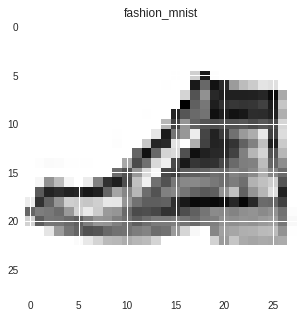

In [6]:
'''
- load fashin_minist dataset
- 10 classes 0-9
'''
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/255
print('x_train shape: ',x_train.shape,', x_train data type: ', x_train.dtype)
print('x_test shape: ',x_test.shape,', x_test data type: ',x_test.dtype)
 
plt.figure(figsize=(5,5))
plt.imshow(x_train[258].reshape((28,28)).astype('float32'))
plt.title('fashion_mnist')
plt.show()

In [368]:
'''
- data pipeline from Numpy Arrays
- tf.data.Dataset.from_tensor_slices
'''
batch_size = 128
shuffle_buffer_size = 10000
tf.random.set_seed(5)
train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(batch_size).shuffle(shuffle_buffer_size)
train_data = train_data.repeat()
test_data = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(batch_size).shuffle(shuffle_buffer_size)
test_data = test_data.repeat()

In [40]:
'''
- data pipline from Numpy with iterator
- tf.data.Dataset.from_tensor_slices
- tf.compat.v1.data.make_one_shot_iteraor
'''
batch_size = 128
shuffle_buffer_size = 10000
tf.random.set_seed(5)
train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(batch_size).shuffle(shuffle_buffer_size)
test_data = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(batch_size).shuffle(shuffle_buffer_size)
train_iterator = tf.compat.v1.data.make_one_shot_iterator(train_data)
test_iterator = tf.compat.v1.data.make_one_shot_iterator(test_data)

tr_x,tr_y = train_iterator.get_next()
print('x shape:',tr_x.shape)
print('y shape:',tr_y.shape)
te_x,te_y = test_iterator.get_next()
print('x shape:',te_x.shape)
print('y shape:',te_y.shape)

x shape: (128, 28, 28, 1)
y shape: (128,)
x shape: (128, 28, 28, 1)
y shape: (128,)


In [108]:
'''
- data pipline from CSV file 
- tf.data.experimental.make_csv_dataset()
'''
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

In [109]:
train_dt = pd.read_csv(train_file_path)
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [110]:
test_dt = pd.read_csv(test_file_path)
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            264 non-null    int64  
 1   sex                 264 non-null    object 
 2   age                 264 non-null    float64
 3   n_siblings_spouses  264 non-null    int64  
 4   parch               264 non-null    int64  
 5   fare                264 non-null    float64
 6   class               264 non-null    object 
 7   deck                264 non-null    object 
 8   embark_town         264 non-null    object 
 9   alone               264 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 20.8+ KB


In [316]:
LABEL_COLUMN = 'survived'
LABELS = [0,1]

def get_csv_data(file_path, batch=3, **kwargs):
    csvData = tf.data.experimental.make_csv_dataset(
        file_pattern = file_path,
        batch_size = batch,
        label_name = LABEL_COLUMN,
        na_value = "?",
        num_epochs= 1,
        ignore_errors = True,
        **kwargs
    )
    return csvData

# load csv data
train_data = get_csv_data(train_file_path)
test_data = get_csv_data(test_file_path)

In [163]:
def show_batch(dataset):
    '''
    - take only one batch of data for the display -> dataset.take(1)
    - two batches data will be taken -> dataset.take(2)
    - {:20s} -> 20 spaces 
    ''' 
    for batch, label in dataset.take(1):
        for key, value in batch.items():
            print("{:20s}: {}".format(key,value.numpy()))
        print("\n{:20s}: {}".format('labels',label.numpy()))
            
show_batch(train_data)

sex                 : [b'male' b'female' b'female']
age                 : [32. 28. 39.]
n_siblings_spouses  : [0 1 1]
parch               : [0 0 1]
fare                : [ 56.4958 133.65    83.1583]
class               : [b'Third' b'First' b'First']
deck                : [b'unknown' b'unknown' b'E']
embark_town         : [b'Southampton' b'Southampton' b'Cherbourg']
alone               : [b'y' b'n' b'n']

labels              : [1 1 1]


In [124]:
'''
- column_names -> to name the columes if the dataset has no column names 
- select_columns -> to select which column of data will be extraced from csv
'''
temp_data = get_csv_data(train_file_path, column_names = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone'])
print('column_names example data: ')
show_batch(temp_data)

temp_data = get_csv_data(train_file_path, select_columns = ['survived','age','parch'])
print('\nselect_columns example data: ')
show_batch(temp_data)

column_names example data: 
sex                 : [b'male' b'female' b'female']
age                 : [24. 28. 45.]
n_siblings_spouses  : [0 3 1]
parch               : [0 1 1]
fare                : [ 13.      25.4667 164.8667]
class               : [b'Second' b'Third' b'First']
deck                : [b'unknown' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton']
alone               : [b'y' b'n' b'n']

labels              : [0 0 1]

select_columns example data: 
age                 : [28. 40. 33.]
parch               : [0 1 0]

labels              : [0 1 0]


In [299]:
'''
- load selected column data in one batch size
'''
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare']
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]
temp_dataset = get_csv_data(train_file_path, batch=10, select_columns=SELECT_COLUMNS, column_defaults = DEFAULTS)

show_batch(temp_dataset)

age                 : [ 3. 28. 29. 29. 28. 28. 22. 22. 45. 18.]
n_siblings_spouses  : [4. 1. 1. 1. 0. 0. 0. 0. 1. 0.]
parch               : [2. 2. 1. 0. 0. 0. 0. 1. 1. 1.]
fare                : [ 31.3875  23.45    10.4625  26.       7.75     8.05     7.2292  55.
 164.8667  23.    ]

labels              : [1 0 0 1 1 0 0 1 1 1]


In [311]:
'''
- take one example batch
- The Python iter() function returns an iterator for the given object.
- iter(temp_datset) returns a tensorflow iterator
- example_batch -> tensor dictionary
- labels_batch -> tensor
'''
features, labels = next(iter(temp_dataset)) 
print('one batch data and labels:')
for key,values in features.items():
     print("{:15s}: {}".format(key,values.numpy()))
print("{:20s}: {}".format('labels',labels.numpy()))

'''
- stack rows from top to bottom to make a matrix 
'''
print('\nStack data rows:')
print(tf.stack(list(features.values()),axis=0).numpy())

one batch data and labels:
age            : [32. 28. 21. 18. 18. 29.  4.  1. 40. 18.]
n_siblings_spouses: [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
parch          : [0. 0. 0. 0. 0. 0. 2. 2. 0. 1.]
fare           : [ 8.3625  7.8792 77.9583  7.775  13.      9.5    22.025  20.575  31.
  7.8542]
labels              : [0 1 1 0 0 1 1 1 1 0]

Stack data rows:
[[32.     28.     21.     18.     18.     29.      4.      1.     40.
  18.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      1.      0.
   1.    ]
 [ 0.      0.      0.      0.      0.      0.      2.      2.      0.
   1.    ]
 [ 8.3625  7.8792 77.9583  7.775  13.      9.5    22.025  20.575  31.
   7.8542]]


In [312]:
'''
- define pack function 
- take features and labels in one batch of data
- return a stacked matrix and label pair
'''
def pack_rows (features, labels):
    return tf.stack(list(features.values()),axis=1),labels

packed_dataset = temp_dataset.map(pack_rows)

for features, labels in packed_dataset.take(1):
    print(features.numpy())
    print()
    print(labels.numpy())

[[ 48.      22.      35.      26.      28.      31.      17.      40.
   30.      19.    ]
 [  1.       0.       0.       0.       1.       1.       0.       0.
    0.       0.    ]
 [  0.       0.       0.       0.       0.       0.       0.       0.
    0.       2.    ]
 [ 39.6      9.35     7.05    56.4958  15.5    113.275    8.6625  31.
   10.5     26.2833]]

[1 0 0 1 0 1 0 1 0 1]


In [ ]:
'''
- put all together into one class for the data pipeline process
'''


In [ ]:
'''
- categorical data processing
'''


In [343]:
'''
- one hot encoding
'''
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
y_train = tf.one_hot(y_train, depth=10)
y_train

<tf.Tensor: id=8413, shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

# tf.keras.layers.Layer and activation functions
## - tf.keras.layers.Layer custom definition (https://www.tensorflow.org/guide/keras/custom_layers_and_models#layers_encapsulate_a_state_weights_and_some_computation) use row matrix multiplication;
## - row[...] * mat [...] = row[...]
## - weight matrix shape is input_shape * units and this cannot be changed in the custom layer as it has to be consistentcy for further calculation

In [307]:
'''
- tf.random_normal_initializer
- tf.zeros_initializer
'''
tf.random.set_seed(15)
input_dim = (4,4)
init = tf.random_normal_initializer(mean=0.0, stddev=1)
init_zeros = tf.zeros_initializer()
print('initial weights: ',init(shape=input_dim, dtype=tf.float32))
print('initial zeros: ', init_zeros(shape=input_dim))

initial weights:  tf.Tensor(
[[ 0.40749726  0.02219561 -2.200683   -0.8212301 ]
 [-0.36420798 -2.177051   -0.8709116  -0.40788257]
 [ 0.37394255 -0.49891925 -0.00245201 -0.14541708]
 [ 0.56160647 -0.88500816 -0.12318895  0.7797051 ]], shape=(4, 4), dtype=float32)
initial zeros:  tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(4, 4), dtype=float32)


In [615]:
'''
- single linear combination layer with self-defined weights, units -> output channels, input_shape -> input shape
- computation is max[...]*col[...] = col[...]
- **kwargs-> allowed_kwargs = {
                                'input_shape',
                                'batch_input_shape',
                                'batch_size',
                                'weights',
                                'activity_regularizer',
                                'autocast'
                            }
- 
'''
class customLayer(tf.keras.layers.Layer):
    #constructor
    def __init__(self, units = 3, input_shape=5, trainable=True, name=None, dtype=tf.float32, **kwargs):
        # parent constructor
        super(customLayer, self).__init__(name=name, dtype= dtype, trainable=trainable, **kwargs)
        # fields
        init_w = tf.random_normal_initializer(mean=0, stddev=1)
        init_b = tf.zeros_initializer()
        self.w = tf.Variable(init_w(shape=(units, input_shape),dtype=dtype), trainable=trainable)
        self.b = tf.Variable(init_b(shape=(units,)),dtype=dtype, trainable=trainable)       
    
    def call(self, inputs):
        if tf.rank(inputs)==1:
            inputs = tf.keras.backend.expand_dims(inputs, axis=1)
        return tf.matmul(self.w, inputs)+self.b

In [616]:
input_shape=4
units= 5
ipt = tf.ones((input_shape))
layer1 = customLayer(units=units, input_shape=input_shape, name='test')
print(f'input shape is at {input_shape} * 1: \n{ipt}')
print(f'\nlayer1 trainable weights is at {units}*{input_shape}: \n  {layer1.weights[0].numpy()}',)
print(f'\noutput channels is at {units}*1: \n {layer1(ipt).numpy()}')
print('\nlayer1 trainable bias: \n', layer1.weights[1].numpy())
print('\nlayer1 non-trainable weights:\n', layer1.non_trainable_weights)

input shape is at 4 * 1: 
[1. 1. 1. 1.]

layer1 trainable weights is at 5*4: 
  [[ 2.1618998   0.07567143  1.8947576   1.5536673 ]
 [-1.2869931  -0.81316155  0.6367824  -1.7842115 ]
 [ 0.32601485 -0.3001915  -0.73505306  0.06373952]
 [-0.6815776  -0.5778277   1.0000818   0.6779952 ]
 [ 0.38209513 -0.7653013  -0.3519354   0.03938751]]

output channels is at 5*1: 
 [[ 5.685996    5.685996    5.685996    5.685996    5.685996  ]
 [-3.2475839  -3.2475839  -3.2475839  -3.2475839  -3.2475839 ]
 [-0.64549017 -0.64549017 -0.64549017 -0.64549017 -0.64549017]
 [ 0.4186716   0.4186716   0.4186716   0.4186716   0.4186716 ]
 [-0.695754   -0.695754   -0.695754   -0.695754   -0.695754  ]]

layer1 trainable bias: 
 [0. 0. 0. 0. 0.]

layer1 non-trainable weights:
 []


In [630]:
'''
- Multi-layer Perceptron(MLP) layer
- subclass of tf.keras.layers.Layer class
- this layer has no batch size feature
- this layer use build() to identify the input shape on the runtime
- this layer use row multiplication caculation on weights and inputs
- add_weight(
        name=None, shape=None, dtype=None, initializer=None, regularizer=None,
        trainable=None, constraint=None, partitioner=None, use_resource=None,
        synchronization=tf.VariableSynchronization.AUTO,
        aggregation=tf.compat.v1.VariableAggregation.NONE, **kwargs
    )
- **kwargs: `getter`, 'collections`, `experimental_autocast` and `caching_device`.

'''
class MLP(tf.keras.layers.Layer):
    def __init__(self, units=3, activation=None, trainable=True, name=None, dtype=tf.float32, **kwargs):
        super(MLP, self).__init__( name=name, trainable = trainable, dtype=dtype, **kwargs)
        self.units = units;
        self.__activation_name = activation
        self.activation = tf.keras.activations.get(activation)
        
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),initializer='random_normal')
    
    def get_config(self):
        config_dic ={
            'units':self.units,
            'activation': self.__activation_name, 
            'trainable_weights & bias':self.trainable_weights,
            'non-trainable_weights & bias':self.non_trainable_weights,
        }
        config = super(MLP,self).get_config()
        config.update(config_dic)
        return config
    
    def call(self, inputs, training = None):
        if tf.rank(inputs)==1:
            inputs = tf.keras.backend.expand_dims(inputs, axis=0)
        linear_combination = tf.matmul(inputs, self.w)+self.b 
        return self.activation(linear_combination)

In [631]:
'''
- get_config() function
- override get_config() in the tf.keras.layers.Layer
- "input_shape" in kwards is to generate "batch_input_shape" and it should be avoided in the custom layer
- instead, use build() to get the real input shape in the custom layer
'''
input_shape=4
units= 5
ipt = tf.ones((input_shape))
mlp = MLP(units=units, activation=None, name='mlp_single_layer', trainable=True)
opt = mlp(ipt)
mlp.get_config()

{'name': 'mlp_single_layer',
 'trainable': True,
 'dtype': 'float32',
 'units': 5,
 'activation': None,
 'trainable_weights & bias': [<tf.Variable 'mlp_single_layer/Variable:0' shape=(4, 5) dtype=float32, numpy=
  array([[-0.04268041, -0.0240161 , -0.00559446,  0.00667279,  0.05542039],
         [ 0.0149584 ,  0.04895762,  0.00866133, -0.03208294, -0.02934596],
         [ 0.12082821, -0.01217135,  0.06881073, -0.04737529, -0.01472751],
         [ 0.09234401, -0.05215368,  0.03285414, -0.01964135,  0.09214985]],
        dtype=float32)>,
  <tf.Variable 'mlp_single_layer/Variable:0' shape=(5,) dtype=float32, numpy=
  array([ 0.06843295,  0.02584788,  0.0653073 , -0.0641969 , -0.0261974 ],
        dtype=float32)>],
 'non-trainable_weights & bias': []}

In [632]:
'''
- single MLP layer computation
- without activation functions
- with build() to acquire input_shape
'''
input_shape=4
units= 5
ipt = tf.ones((input_shape))
mlp = MLP(units=units,activation=None, name='mlp_single_layer')
opt = mlp(ipt)
print(f'input shape is at {input_shape}: \n{ipt}')
print(f'\nlayer1 trainable weights is at {input_shape}*{units}: \n  {mlp.weights[0].numpy()}',)
print(f'\nlayer1 trainable bias is at {units}: \n  {mlp.weights[1].numpy()}',)
print(f'\noutput channels is at {units}: \n {mlp(ipt).numpy()}')
print('\nlayer1 non-trainable weights:\n', mlp.non_trainable_weights)

input shape is at 4: 
[1. 1. 1. 1.]

layer1 trainable weights is at 4*5: 
  [[-0.02856542  0.03515685 -0.06862309  0.07264601 -0.02461529]
 [-0.00546568 -0.04800047  0.15303433 -0.06815054  0.03404353]
 [-0.02024032  0.07377522  0.01931716  0.03163869  0.01544571]
 [-0.05890731 -0.13744293 -0.08588818 -0.01069717 -0.04543935]]

layer1 trainable bias is at 5: 
  [ 0.06411647  0.01416687  0.05103198 -0.03926305 -0.04594219]

output channels is at 5: 
 [[-0.04906226 -0.06234445  0.06887219 -0.01382606 -0.06650759]]

layer1 non-trainable weights:
 []


In [633]:
'''
- multiple MLP layers computation
- without activation functions
- with input_shape acquired by build() function
'''
tf.random.set_seed(15)
input_shape=5
ipt = tf.random.normal(shape=(input_shape,))
mlp1 = MLP(units=5, activation= None, name='mlp_layer1')
mlp2 = MLP(units=1, activation=None,  name='mlp_layer2')
opt = mlp1(ipt)
opt = mlp2(opt)
print('input:', ipt.numpy())
print('\nfinal output: ', opt.numpy())
print('\nmlp1 layer weights and bias: \n',[val.numpy() for val in mlp1.weights])
print('\nmlp2 layer weights and bias: \n',[val.numpy() for val in mlp2.weights])

input: [ 0.40749726  0.02219561 -2.200683   -0.8212301  -0.36420798]

final output:  [[0.00949545]]

mlp1 layer weights and bias: 
 [array([[-0.05752216, -0.01777615, -0.0443813 , -0.07142202,  0.03639229],
       [ 0.05079982,  0.01979304, -0.01862826, -0.01179774,  0.03318491],
       [-0.0077181 , -0.0696383 , -0.09101368, -0.00102651,  0.03367503],
       [-0.07211521,  0.02843316, -0.05534288, -0.08601289,  0.10155316],
       [-0.00349029, -0.05710344,  0.02195667,  0.02711194, -0.05647339]],
      dtype=float32), array([ 0.01557087,  0.06733529, -0.02465851, -0.09773596,  0.00385595],
      dtype=float32)]

mlp2 layer weights and bias: 
 [array([[-0.02640516],
       [ 0.02764253],
       [-0.0596687 ],
       [-0.02553965],
       [ 0.04818435]], dtype=float32), array([0.02116098], dtype=float32)]


In [639]:
'''
- multiple MLP with 'sigmoid' activation function
'''
tf.random.set_seed(15)
input_shape=5
ipt = tf.random.normal(shape=(input_shape,))
opt = MLP(units = 256, activation = 'relu')(ipt)
opt = MLP(units = 128, activation = 'relu')(ipt)
opt = MLP(units =10, activation= 'softmax')(opt)
print('output: \n',opt.numpy())

output: 
 [[0.08908382 0.09991569 0.10659099 0.10593536 0.09802915 0.08910162
  0.09953129 0.11073688 0.09931216 0.10176301]]


In [640]:
'''
- tf activation functions
- tf.keras.activations module
'''
ipt = tf.random.normal(shape=(1,10))
print('input is: \n', ipt.numpy())

linear_res = tf.keras.activations.get(None)(ipt)
print('\ndefault linear activation output: \n',linear_res.numpy())

sigmoid_res = tf.keras.activations.get('sigmoid')(ipt)
print('\nsigmoid activation output: \n',sigmoid_res.numpy())

tanh_res = tf.keras.activations.tanh(ipt)
print('\ntanh activation output: \n',tanh_res.numpy())

relu_res = tf.keras.activations.relu(ipt)
print('\nrelu activation output: \n',relu_res.numpy())

softmax_res = tf.keras.activations.softmax(ipt)
print('\nsoftmax activation output: \n',softmax_res.numpy())

input is: 
 [[ 0.19024122 -0.4606145  -0.13381146 -2.562121   -0.72492903  0.613187
  -0.15034355 -1.5807154   0.6264738   0.9457944 ]]

default linear activation output: 
 [[ 0.19024122 -0.4606145  -0.13381146 -2.562121   -0.72492903  0.613187
  -0.15034355 -1.5807154   0.6264738   0.9457944 ]]

sigmoid activation output: 
 [[0.5474174  0.38684008 0.46659696 0.07161635 0.32630855 0.64866745
  0.46248475 0.17069417 0.65168947 0.72026867]]

tanh activation output: 
 [[ 0.18797891 -0.43058494 -0.1330185  -0.98816895 -0.61995316  0.54636663
  -0.14922096 -0.91871357  0.5556194   0.7378732 ]]

relu activation output: 
 [[0.19024122 0.         0.         0.         0.         0.613187
  0.         0.         0.6264738  0.9457944 ]]

softmax activation output: 
 [[0.11373109 0.05932205 0.08225171 0.00725343 0.04554344 0.17360501
  0.08090309 0.01935363 0.17592703 0.24210948]]


# tf gradients and loss functions

In [150]:
'''
- batch = 1
- x is tf.constant and it is not trainable so tape.gradient() on x is not working, 
- weight and bias is tf.Variable and it is trainalbe
'''
x = tf.constant(2.0) 
weight = tf.Variable(2.0)
bias = tf.Variable(2.0)
with tf.GradientTape(persistent = True, watch_accessed_variables=True) as tape:
    y = weight * x + bias
    
dy_dw = tape.gradient(y, weight)
dy_db = tape.gradient(y, bias)
    
print(f'dy_dw: {dy_dw},\ndy_db: {dy_db}')

dy_dw: 2.0,
dy_db: 1.0


In [149]:
'''
- btach = 3
- x is tf.constant and it is not trainable so tape.gradient() on x is not working, 
- weight and bias is tf.Variable and it is trainalbe
'''
x = tf.constant([[2],[2],[2]], dtype=tf.float32) 
weight = tf.Variable(2, dtype=tf.float32)
bias = tf.Variable(2, dtype=tf.float32)
with tf.GradientTape(persistent = True, watch_accessed_variables=True) as tape:
    y = weight * x + bias
    
dy_dw = tape.gradient(y, weight)
dy_db = tape.gradient(y, bias)

print(y)
print(f'dy_dw: {dy_dw},\ndy_db: {dy_db}')

tf.Tensor(
[[6.]
 [6.]
 [6.]], shape=(3, 1), dtype=float32)
dy_dw: 6.0,
dy_db: 3.0


In [151]:
'''
- batch =1
- gradients for nested calculation function 
'''
x = tf.constant(2.0) 
weight = tf.Variable(2, dtype=tf.float32)
weight2 = tf.Variable(2, dtype=tf.float32)
bias = tf.Variable(2.0, dtype=tf.float32)

def y1 (weight, bias, x):
    return weight * x + bias

def y1_square(x):
    return weight2*x**2

with tf.GradientTape(persistent = True, watch_accessed_variables=True) as tape:
    y = y1_square(y1(weight, bias, x))   
    
dy_dw = tape.gradient(y, weight)
dy_dw2 = tape.gradient(y, weight2)
dy_db = tape.gradient(y, bias)
    
print(f'dy_dw: {dy_dw},\ndy_dw2:{dy_dw2},\ndy_db: {dy_db}')


dy_dw: 48.0,
dy_dw2:36.0,
dy_db: 24.0


In [154]:
'''
- btach = 1
- gradients on linear combination function with 1-dim weights
'''
ipt = tf.Variable([[1,2,3]],dtype=tf.float32) 
w = tf.Variable([[1],[2],[3]],dtype=tf.float32)
b = tf.Variable([1],dtype=tf.float32)

def linear_combination(ipt,weight,bias):
    return tf.matmul(ipt,weight)+bias

with tf.GradientTape(persistent = True, watch_accessed_variables=True) as tape:
    y = linear_combination(ipt,w,b)
dy_dw = tape.gradient(y, w)
dy_db = tape.gradient(y, b)
    
print(f'dy_dw:\n{dy_dw},\ndy_db:\n{dy_db}')

dy_dw:
[[1.]
 [2.]
 [3.]],
dy_db:
[1.]


In [153]:
'''
- multiple inputs on a logistic regression calculation with multiple outpus
- binary_cross_entropy for the loss
'''
tf.random.set_seed(2)
init = tf.random_normal_initializer(mean=0.0, stddev=1)
ipt = tf.Variable(initial_value=init(shape=(1,5),dtype=tf.float32)) 
w = tf.Variable(initial_value= init(shape=(5,3),dtype=tf.float32))
b = tf.Variable(initial_value= init(shape=(1,3),dtype=tf.float32))
target = tf.Variable(initial_value = init(shape=(1,3),dtype= tf.float32))

def logistic_regression(ipt,weight,bias):
    return tf.keras.activations.sigmoid(tf.matmul(ipt,weight)+bias)

def cross_entropy_loss(label,predict):
    loss =  tf.keras.losses.BinaryCrossentropy()
    return loss(label,predict)

with tf.GradientTape(persistent = True, watch_accessed_variables=True) as tape:
    loss = cross_entropy_loss(target,logistic_regression(ipt,w,b))
dy_dw = tape.gradient(loss, w)
dy_db = tape.gradient(loss, b)
    
print(f'dy_dw:\n{dy_dw},\ndy_db:\n{dy_db}')

dy_dw:
[[ 4.0688735e-01  1.2480556e-02  1.3418210e-01]
 [-1.7811962e+00 -5.4635078e-02 -5.8739763e-01]
 [ 1.2863358e+00  3.9456099e-02  4.2420402e-01]
 [-9.7072709e-01 -2.9775353e-02 -3.2012349e-01]
 [-8.9167268e-04 -2.7350497e-05 -2.9405317e-04]],
dy_db:
[[0.9328666  0.02861405 0.30763796]]


# tf.keras custom model training I
### - training a small dataset with stochastic gradient decent
### - loss function is mean least square
### - MLP model to simulate a linear combination

In [5]:
'''
- MLP layer
'''
class MLP(tf.keras.layers.Layer):
    def __init__(self, units=3, activation=None, trainable=True, name=None, dtype=tf.float32, **kwargs):
        super(MLP, self).__init__( name=name, trainable = trainable, dtype=dtype, **kwargs)
        self.units = units
        self.__activation_name = activation
        self.activation = tf.keras.activations.get(activation)
        
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',)
        self.b = self.add_weight(shape=(self.units,),initializer='random_normal')
        
    def get_config(self):
        config_dic ={
            'units':self.units,
            'activation': self.__activation_name, 
            'trainable_weights & bias':self.trainable_weights,
            'non-trainable_weights & bias':self.non_trainable_weights,
        }
        config = super(MLP,self).get_config()
        config.update(config_dic)
        return config
    
    def call(self, inputs, training = None):
        if tf.rank(inputs)==1:
            inputs = tf.keras.backend.expand_dims(inputs, axis=0)
        linear_combination = tf.matmul(inputs, self.w)+self.b 
        return self.activation(linear_combination)

In [18]:
'''
- subclass model
'''
class MLP_Model(tf.keras.Model):
    def __init__(self, **kwargs):
        super(MLP_Model, self).__init__(self, **kwargs)
        self.mlp1 = MLP(5)
        self.mlp2 = MLP(1)
        
    def call(self, inputs):
        opt = self.mlp1(inputs)
        opt = self.mlp2(opt)
        return opt

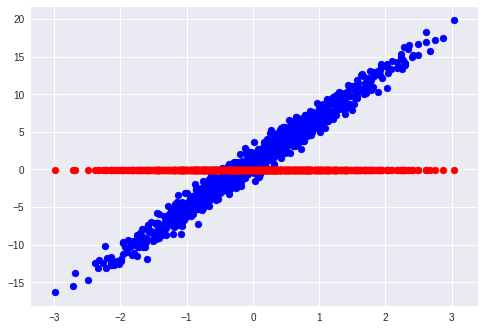

In [25]:
'''
- generate random data 
'''
# define random data
w = 6
b = 1
batch = 1000
inputs  = tf.random.normal(shape=(batch,1), mean=0, stddev=1)
noise   = tf.random.normal(shape=(batch,1), mean=0, stddev=1)
outputs = inputs * w + b + noise

# plotting 
model = MLP_Model()
plt.scatter(inputs,outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

final epoch: 50, loss: 0.9573383331298828


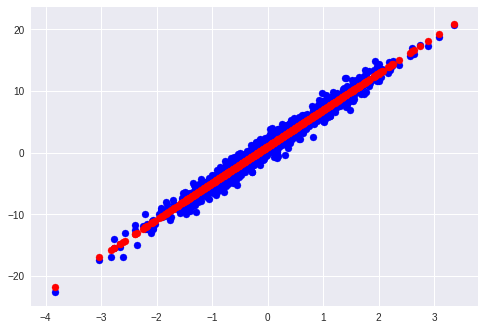

In [23]:
'''
- custom model training with SGD and mean square loss function
'''
# define model
model = MLP_Model()

# define loss
mean_square_loss = tf.keras.losses.MeanSquaredError()

# gradient function -> return loss -> return gradients
def get_grad(target, model, data):
    with tf.GradientTape() as tape:
        loss = mean_square_loss(target, model(data))
    return loss, tape.gradient(loss, model.trainable_variables)

# define optimizer
SGD = tf.keras.optimizers.SGD(learning_rate=0.01)

# training process
num_epochs = 50
for _ in range(num_epochs):
    loss, grad = get_grad(outputs, model, inputs)
    SGD.apply_gradients(zip(grad, model.trainable_variables))
print(f'final epoch: {SGD.iterations.numpy()}, loss: {loss}')

# plotting 
plt.scatter(inputs,outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

# tf.keras custom model training II
## - training model a formal dataset with batches 
## - loss function is categorial cross entropy
## - optimizer is SGD

In [22]:
# load tensorflow built in dataset
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

data = pd.read_csv(train_dataset_url)
data.head()

8192/2194 [================================================================================================================] - 0s 0us/step


,120,4,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   120         120 non-null    float64
 1   4           120 non-null    float64
 2   setosa      120 non-null    float64
 3   versicolor  120 non-null    float64
 4   virginica   120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


In [12]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))
print(f"Label classes:{class_names}")

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species
Label classes:['Iris setosa', 'Iris versicolor', 'Iris virginica']


In [13]:
# rename the dataset column name
data = data.rename(columns={'120': "sepal_length", '4': "sepal_width", 'setosa': "petal_length",'versicolor':'petal_width','virginica':'species'})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


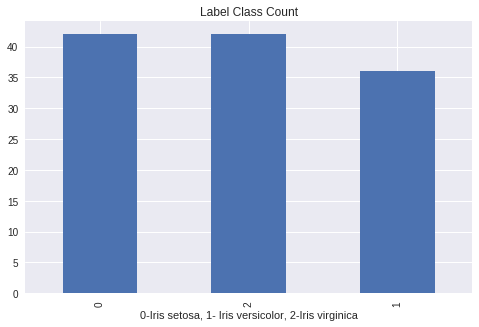

In [14]:
# count label classes
data['species'].value_counts().sort_values(ascending=False).plot.bar(figsize=(8,5))
plt.title('Label Class Count')
plt.xlabel('0-Iris setosa, 1- Iris versicolor, 2-Iris virginica')
plt.show()

In [65]:
'''
- generate csv file data pipeline with tf.data.Dataset
'''
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

dataCSV = tf.data.experimental.make_csv_dataset(
    file_pattern = train_dataset_fp, 
    batch_size = 32,
    column_names= column_names, 
    label_name= 'species', 
    num_epochs = 40,
    shuffle=True,
    shuffle_buffer_size=100, 
)
dataCSV

<PrefetchDataset shapes: (OrderedDict([(sepal_length, (None,)), (sepal_width, (None,)), (petal_length, (None,)), (petal_width, (None,))]), (None,)), types: (OrderedDict([(sepal_length, tf.float32), (sepal_width, tf.float32), (petal_length, tf.float32), (petal_width, tf.float32)]), tf.int32)>

In [66]:
'''
- print one batch data and labels
'''
features, labels = next(iter(dataCSV))
for key, value in features.items():
    print(key,":\n",value.numpy())
print('labels:\n',labels.numpy())

sepal_length :
 [7.7 5.4 5.8 5.2 7.4 5.4 6.1 7.9 7.2 4.6 6.5 6.1 5.7 6.4 6.  5.7 7.7 6.8
 5.9 5.  6.9 6.4 6.7 5.1 5.  5.4 6.1 5.5 4.9 5.6 5.7 5.5]
sepal_width :
 [2.6 3.9 4.  2.7 2.8 3.7 3.  3.8 3.6 3.1 3.  2.6 2.8 3.2 2.2 3.8 3.  3.2
 3.  2.  3.2 3.2 3.  3.5 3.4 3.  2.9 2.6 2.5 2.9 3.  3.5]
petal_length :
 [6.9 1.7 1.2 3.9 6.1 1.5 4.9 6.4 6.1 1.5 5.5 5.6 4.5 5.3 5.  1.7 6.1 5.9
 5.1 3.5 5.7 4.5 5.  1.4 1.5 4.5 4.7 4.4 4.5 3.6 4.2 1.3]
petal_width :
 [2.3 0.4 0.2 1.4 1.9 0.2 1.8 2.  2.5 0.2 1.8 1.4 1.3 2.3 1.5 0.3 2.3 2.3
 1.8 1.  2.3 1.5 1.7 0.3 0.2 1.5 1.4 1.2 1.7 1.3 1.2 0.2]
labels:
 [2 0 0 1 2 0 2 2 2 0 2 2 1 2 2 0 2 2 2 1 2 1 1 0 0 1 1 1 2 1 1 0]


In [67]:
'''
- pack data into tensor 
- make one-hot-encoding labels
'''
def pack_rows (features, labels):
    labels = tf.one_hot(labels, 3)
    return tf.stack(list(features.values()),axis=1),labels

packed_dataset = dataCSV.map(pack_rows)

In [68]:
features, labels = next(iter(packed_dataset))
print('features: \n',features[:10])
print('labels: \n',labels[:10])

features: 
 tf.Tensor(
[[7.7 2.6 6.9 2.3]
 [5.4 3.9 1.7 0.4]
 [5.8 4.  1.2 0.2]
 [5.2 2.7 3.9 1.4]
 [7.4 2.8 6.1 1.9]
 [5.4 3.7 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [7.9 3.8 6.4 2. ]
 [7.2 3.6 6.1 2.5]
 [4.6 3.1 1.5 0.2]], shape=(10, 4), dtype=float32)
labels: 
 tf.Tensor(
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]], shape=(10, 3), dtype=float32)


In [69]:
'''
- build model with tf.kers API
'''
ipt = tf.keras.Input(shape=(4,))
opt = tf.keras.layers.Dense(32, activation='relu')(ipt)
opt = tf.keras.layers.Dense(16, activation='relu')(opt)
opt = tf.keras.layers.Dense(3, activation='softmax')(opt)
model = tf.keras.Model(ipt, opt)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 51        
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''
- custom training process
- loss -> categorical_cross_entroty
- optimizer -> SGD
'''
loss_func = tf.keras.losses.categorical_crossentropy()
def grad(target, model, data):
    with tf.GradientTape() as tape: 
        loss = loss_func(target, model(data))
    return loss, tape.gradient(loss, model.trainable_variables)

def train_model(epochs):
    history_acc = []
    history_loss = []
    for _ in range(epochs):
        pass